In [55]:
norm(x) = sqrt(x'*x)
function ConjugateGradientFSO(f, g, h, x0; 
        ϵx=0.01, # precision for step size
        ϵf=0.01, 
        ϵg=0.01, 
        debug=false)
    #check arguments
    n, m=size(h)
    if n≠m
        error("ERROR: Matrix H is not square!")
    end
    steps=[]
    maxIterations = n
    xk = x0
    fk = f(xk...)
    gk = g(xk...)
    dk = -gk
    dh = dk'*h*dk
    α =  -dk'*gk/dh
    δ =  α .*dk
    #xn = xk .+ δ
    #fn = f(xn...)
    #gn = g(xn...)
    push!(steps, xk)
    if (norm(gk)<=ϵg)
        println("Convergence is reached after 1 iteration.")
        return xk, fk, gk, steps
    end
    for i in 1:maxIterations
        # iteration
        xn = xk .+ δ
        push!(steps, xn)
        fn = f(xn...)
        gn = g(xn...)
        βn = dk'*h*gn/dh
        dn = -gn .+ βn.*dk
        dh = dn'*h*dn
        α  = -dn'*gn/dh
        δ  = α.*dn       
        # convegence?
        if (norm(gn)<=ϵg)
            println("Convergence is reached after ", i, " iterations.")
            return xn, fn, gn, steps
        end
        xk = xn
        fk = fn
        dk = dn
        if debug
            println("i=",i," x=", xn, " α=", α, " β=", βn, " gn=", gn, " d=", dn, " δ= ",δ)
        end
    end
    #println("WARN:", maxIterations, " iterations have been exceeded!")
end

ConjugateGradientFSO (generic function with 1 method)

In [56]:
xn, fn, gn, steps=
ConjugateGradientFSO(
    (x,y)->x^2+6*y^2+3*x*y-x-8*y,
    (x,y)->[2*x+3*y-1,12*y+3*x-8],
    [2 3;3 12],
    [1.,1.],
    debug=false
)

Convergence is reached after 2 iterations.


([-0.8, 0.866667], -3.0666666666666664, [4.44089e-16, 0.0], Any[[1.0, 1.0], [0.670051, 0.422589], [-0.8, 0.866667]])

In [57]:
function second_order_gradient(f, g, h, x0; 
        ϵx=0.01, # precision for step size
        ϵf=0.01, 
        ϵg=0.01, 
        maxIterations=128,
        debug=false) 
    
    xk = x0
    fk = f(xk...)
    N=[ ]
    for i in 1:maxIterations
        # iteration
        d =-g(xk...)
        α = d'*d/(d'*h*d)
        δ = α*d
        xn = xk .+ δ
        fn = f(xn...)
        N=push!(N,xk)
        # convegence?
        if (norm(δ)<=ϵx)&&(abs(fn-fk)<=ϵf)&&(norm(d)<=ϵg)
            println("Convergence is reached after ", i, " iterations.")
            return N
        end
        if debug
            println("i=",i, " α=", α, " xk=", xk, " d=", d, " δ= ",δ)
        end
        xk = xn
        fk = fn
    end
    println("WARN:", maxIterations, " iterations have been exceeded!")
    #return N
    
end

second_order_gradient (generic function with 1 method)

In [58]:
a=second_order_gradient(
    (x,y)->x^2+6*y^2+3*x*y-x-8*y,
    (x,y)->[2*x+3*y-1,12*y+3*x-8],
    [2 3;3 12],
    [1.,1.],
    debug=false
)

Convergence is reached after 12 iterations.


12-element Array{Any,1}:
 [1.0, 1.0]           
 [0.670051, 0.422589] 
 [-0.1866, 0.912104]  
 [-0.29904, 0.715335] 
 [-0.590967, 0.882151]
 [-0.629284, 0.815096]
 [-0.728766, 0.871943]
 [-0.741824, 0.849093]
 [-0.775725, 0.868465]
 [-0.780175, 0.860678]
 [-0.791728, 0.867279]
 [-0.793244, 0.864626]

In [59]:
function newton(f, g, h, x0; 
        ϵx=0.01, # precision for step size
        ϵf=0.01, 
        ϵg=0.01, 
        maxIterations=128,
        debug=false) 
    
    xk = x0
    fk = f(xk...)
    N=[ ]
    h=h(xk...)
    for i in 1:maxIterations
        # iteration
        #d =-g(xk...)
        #α = d'*d/(d'*h*d)
        #δ = α*d
        xn = xk .- h^(-1)*g(xk...)
        
        fn = f(xn...)
        
        N=push!(N,xk)
        # convegence?
        if (abs(fn-fk)<=ϵf)
            println("Convergence is reached after ", i, " iterations.")
            return N
        end
        if debug
            println("i=",i," xk=", xk,)
        end
        xk = xn
        fk = fn
    end
    println("WARN:", maxIterations, " iterations have been exceeded!")
    #return N
    
end

newton (generic function with 1 method)

In [60]:
b=newton(
    (x,y)->x^2+6*y^2+3*x*y-x-8*y,
    (x,y)->[2*x+3*y-1,12*y+3*x-8],
    (x,y)->[2 3;3 12],
    [1.,1.],
    debug=false
)

Convergence is reached after 2 iterations.


2-element Array{Any,1}:
 [1.0, 1.0]      
 [-0.8, 0.866667]

In [61]:
using Gadfly

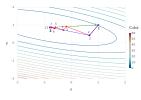

In [68]:
fun=layer((x,y)->x^2+6*y^2+3*x*y-x-8*y, -2,2,-2,2);
#(x,y)<-x^2+6*y^2+3*x*y-x-8*y
#(x,y)<-[2*x+3*y-1,12*y+3*x-8]
#(x,y)<-[2 3;3 12]
########共轭梯度法
s1=layer(
    x=[steps[i][1] for i in 1:length(steps)],
    y=[steps[i][2] for i in 1:length(steps)],
    label=[string(i) for i in 1:length(steps)],
    Geom.point, Geom.line, Geom.label,
    Theme(default_color=colorant"blue"));
#########梯度下降法
s2=layer(
    x=[a[i][1] for i in 1:length(a)],
    y=[a[i][2] for i in 1:length(a)],
    label=[string(i) for i in 1:length(a)],
    Geom.line,Geom.point,Geom.label,
    Theme(default_color=colorant"red"));
#########牛顿法
s3=layer(
    x=[b[i][1] for i in 1:length(b)],
    y=[b[i][2] for i in 1:length(b)],
    label=[string(i) for i in 1:length(b)],
    Geom.line,Geom.point,Geom.label,
    Theme(default_color=colorant"green"));

plot(fun,s1,s2,s3)
